In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
# Load the datasets
tourist_df = pd.read_csv('E:\\FDVA\\data\\processed\\tourist_processed.csv')
festivals_df = pd.read_csv('E:\\FDVA\\data\\processed\\festivals_processed.csv')
cost_df = pd.read_csv('E:\\FDVA\\data\\processed\\cost_processed.csv')
reviews_df = pd.read_csv('E:\\FDVA\\data\\processed\\reviews_processed.csv')

In [3]:
# Print column names to verify
print("Cost DataFrame columns:", cost_df.columns.tolist())
print("Festival DataFrame columns:", festivals_df.columns.tolist())
print("Reviews DataFrame columns:", reviews_df.columns.tolist())
print("Tourist DataFrame columns:", tourist_df.columns.tolist())

Cost DataFrame columns: ['Country', 'Cost of Living Index', 'Rent Index', 'Cost of Living Plus Rent Index', 'Groceries Index', 'Restaurant Price Index', 'Local Purchasing Power Index', 'Affordability_Index']
Festival DataFrame columns: ['Festival_Name', 'Country', 'Month', 'Impact_Score', 'Category', 'Lat', 'Lon', 'Season']
Reviews DataFrame columns: ['Review', 'Rating', 'Review_Text', 'Sentiment_Score']
Tourist DataFrame columns: ['Country', 'Report Type', 'Category', 'Subcategory', 'Metric', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022', 'Avg_Arrivals', 'Tourism_Intensity']


In [4]:
# Strip whitespace from column names
cost_df.columns = cost_df.columns.str.strip()
festivals_df.columns = festivals_df.columns.str.strip()
reviews_df.columns = reviews_df.columns.str.strip()
tourist_df.columns = tourist_df.columns.str.strip()


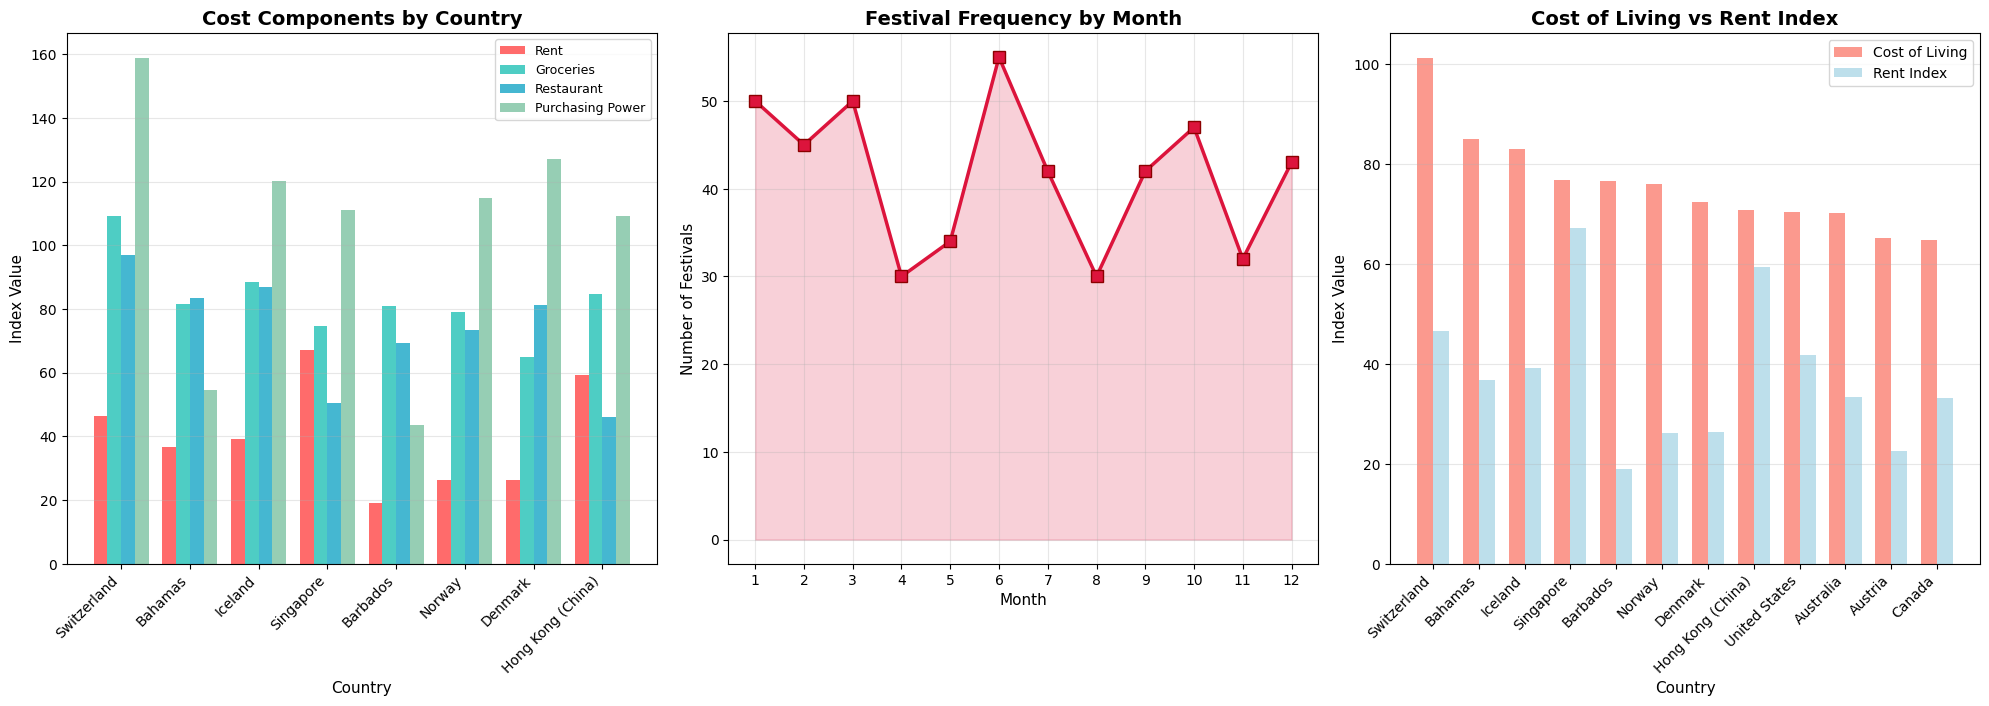

In [5]:
# Create figure with multiple subplots
fig = plt.figure(figsize=(20, 24))

# ============================================================================
# 1. Cost Components Comparison (Grouped Bar Chart)
# ============================================================================
ax10 = plt.subplot(4, 3, 10)
top_countries = cost_df.nlargest(8, 'Cost of Living Index')
x = np.arange(len(top_countries))
width = 0.2

bars1 = ax10.bar(x - width*1.5, top_countries['Rent Index'], width, 
                 label='Rent', color='#FF6B6B')
bars2 = ax10.bar(x - width*0.5, top_countries['Groceries Index'], width,
                 label='Groceries', color='#4ECDC4')
bars3 = ax10.bar(x + width*0.5, top_countries['Restaurant Price Index'], width,
                 label='Restaurant', color='#45B7D1')
bars4 = ax10.bar(x + width*1.5, top_countries['Local Purchasing Power Index'], width,
                 label='Purchasing Power', color='#96CEB4')

ax10.set_xlabel('Country', fontsize=11)
ax10.set_ylabel('Index Value', fontsize=11)
ax10.set_title('Cost Components by Country', fontsize=14, fontweight='bold')
ax10.set_xticks(x)
ax10.set_xticklabels(top_countries['Country'], rotation=45, ha='right')
ax10.legend(fontsize=9)
ax10.grid(axis='y', alpha=0.3)

# ============================================================================
# 2. Festivals by Month (Line Chart)
# ============================================================================
ax11 = plt.subplot(4, 3, 11)
month_counts = festivals_df['Month'].value_counts().sort_index()
ax11.plot(month_counts.index, month_counts.values, marker='s', linewidth=2.5,
          markersize=8, color='crimson', markeredgecolor='darkred')
ax11.fill_between(month_counts.index, month_counts.values, alpha=0.2, color='crimson')
ax11.set_xlabel('Month', fontsize=11)
ax11.set_ylabel('Number of Festivals', fontsize=11)
ax11.set_title('Festival Frequency by Month', fontsize=14, fontweight='bold')
ax11.grid(True, alpha=0.3)
ax11.set_xticks(month_counts.index)

# ============================================================================
# 3. Rent vs Cost of Living (Scatter/Bar)
# ============================================================================
ax12 = plt.subplot(4, 3, 12)
sample_countries = cost_df.nlargest(12, 'Cost of Living Index')
x = np.arange(len(sample_countries))
width = 0.35

bars1 = ax12.bar(x - width/2, sample_countries['Cost of Living Index'], width,
                 label='Cost of Living', color='salmon', alpha=0.8)
bars2 = ax12.bar(x + width/2, sample_countries['Rent Index'], width,
                 label='Rent Index', color='lightblue', alpha=0.8)

ax12.set_xlabel('Country', fontsize=11)
ax12.set_ylabel('Index Value', fontsize=11)
ax12.set_title('Cost of Living vs Rent Index', fontsize=14, fontweight='bold')
ax12.set_xticks(x)
ax12.set_xticklabels(sample_countries['Country'], rotation=45, ha='right')
ax12.legend()
ax12.grid(axis='y', alpha=0.3)

plt.tight_layout()
plt.savefig('E:\\FDVA\\visuals\\tourism_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

In [6]:
# ============================================================================
# Additional Analysis: Summary Statistics
# ============================================================================
print("\n" + "="*80)
print("TOURISM DATA ANALYSIS SUMMARY")
print("="*80)

print(f"\n📊 FESTIVAL STATISTICS:")
print(f"   Total Festivals: {len(festivals_df)}")
print(f"   Countries with Festivals: {festivals_df['Country'].nunique()}")
print(f"   Average Impact Score: {festivals_df['Impact_Score'].mean():.2f}")
print(f"   Most Popular Season: {festivals_df['Season'].mode()[0]}")

print(f"\n💰 COST OF LIVING STATISTICS:")
print(f"   Countries Analyzed: {len(cost_df)}")
print(f"   Average Cost of Living Index: {cost_df['Cost of Living Index'].mean():.2f}")
print(f"   Most Expensive: {cost_df.loc[cost_df['Cost of Living Index'].idxmax(), 'Country']}")
if 'Local Purchasing Power Index' in cost_df.columns:
    print(f"   Best Purchasing Power: {cost_df.loc[cost_df['Local Purchasing Power Index'].idxmax(), 'Country']}")
else:
    print(f"   Most Affordable: {cost_df.loc[cost_df['Cost of Living Index'].idxmin(), 'Country']}")

print(f"\n⭐ REVIEW STATISTICS:")
print(f"   Total Reviews: {len(reviews_df)}")
print(f"   Average Rating: {reviews_df['Rating'].mean():.2f}")
print(f"   Average Sentiment: {reviews_df['Sentiment_Score'].mean():.2f}")

print("\n" + "="*80)


TOURISM DATA ANALYSIS SUMMARY

📊 FESTIVAL STATISTICS:
   Total Festivals: 500
   Countries with Festivals: 20
   Average Impact Score: 0.86
   Most Popular Season: Winter

💰 COST OF LIVING STATISTICS:
   Countries Analyzed: 121
   Average Cost of Living Index: 43.56
   Most Expensive: Switzerland
   Best Purchasing Power: Luxembourg

⭐ REVIEW STATISTICS:
   Total Reviews: 20491
   Average Rating: 3.95
   Average Sentiment: 0.80

